In [ ]:
#install seaborn
%pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#load dataset 
# tips = sns.load_dataset('tips')
# print(tips.head())

# load csv 
tips = pd.read_csv('tips.csv')
print(tips.head())

In [ ]:
tips.info()

In [ ]:
tips.describe()

In [ ]:
# scatter plot
# sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
# set title
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
# print column names
print(tips.columns)
# line plot
sns.lineplot(data=tips, x='total_bill', y='tip', hue='time')
# set title
plt.title('Total Bill vs Tip - Line Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
# load new dataset fmri
# fmri = sns.load_dataset('fmri')
# print(fmri.head())

# load fmri csv
fmri = pd.read_csv('fmri.csv')
print(fmri.head())

In [ ]:
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event', style='region')
plt.title('FMRI Signal over Time')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.show()

In [ ]:
# barplot - categorial data plotting
print(tips.head())

sns.barplot(data=tips,x='day',y='total_bill',hue='time')
plt.title('Average Total Bill per Day by time')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.savefig('barplot.png')
plt.show()

In [ ]:
# histogram of total_bill -> distribution of total_bill

sns.histplot(data=tips, x='total_bill', bins=10, kde=True) # kde -> kernel density estimation ( add a density curve )
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# boxplot - summarize data distribution with respect to categories
# highlight outliers
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')
plt.title('Boxplot of Total Bill by Day and Smoker Status')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

In [ ]:
# load iris dataset
# iris = sns.load_dataset('iris')
# print(iris.head())

# load iris csv
iris = pd.read_csv('iris.csv')
print(iris.head())

In [ ]:
sns.pairplot(iris, hue='species')
plt.suptitle('Iris Pairplot', y=1.02)
plt.show()

In [ ]:
# violin plot - distribution of sepal_length across different species
violinplot = sns.violinplot(data=iris, x='species', y='sepal_length', inner='quartile')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

In [ ]:
# coutplot - count of each species
countplot = sns.countplot(data=iris, x='species')
plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
# facet grid - multiple plots based on categories
g = sns.FacetGrid(tips, col='time', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

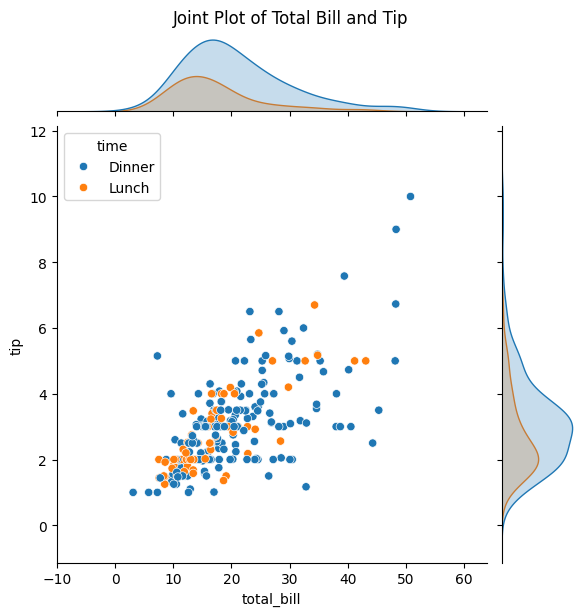

In [48]:
# joint plot - combination of scatter plot and histogram
sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='time')
plt.suptitle('Joint Plot of Total Bill and Tip', y=1.02)
plt.show()